Taking the Data from Yahoo Finance 

# SIMPLE MOVING AVERAGE 

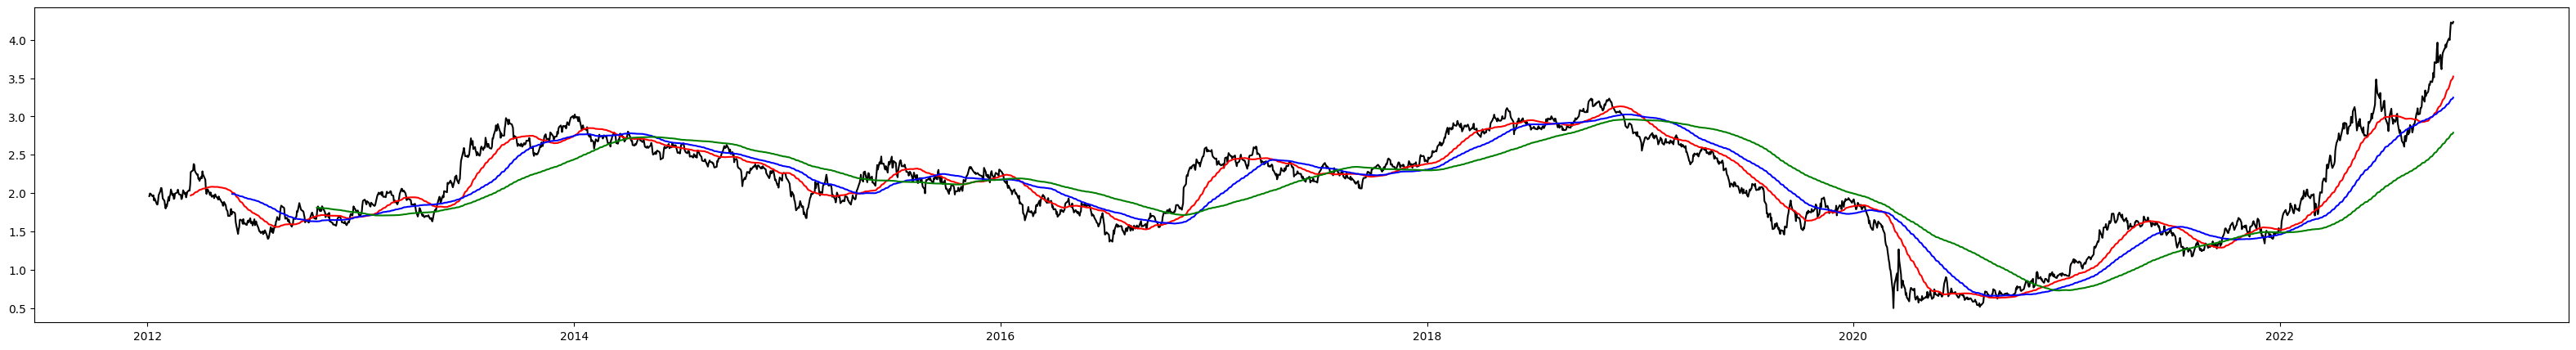

In [60]:
import datetime as dt
import pandas as pd
import pandas_datareader as web
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


ticker = '^TNX'
start = dt.datetime(2012,1,1)
end = dt.datetime(2022,10,25)

history = web.DataReader(ticker, 'yahoo', start=start, end=end)
history = history.loc[:, ['Open', 'Close']]
history.head()



history['Previous_Close'] = history.loc[:, 'Close'].shift(1)  #First Indicator 
# display(history)

datetimes = history.index.values #Second Indicator 
weekdays = []

for dt in datetimes:
    dt = datetime.strptime(str(dt), '%Y-%m-%dT%H:%M:%S.000000000')
    weekdays.append(dt.weekday())


history['Weekday'] = weekdays

history['50SMA'] = history['Previous_Close'].rolling(50).mean()
history['100SMA'] = history['Previous_Close'].rolling(100).mean()
history['200SMA'] = history['Previous_Close'].rolling(200).mean()


x = history.index.values # X values is the overall time 


plt.figure(figsize=(40,5))
plt.plot(x, history['Previous_Close'], color = 'black')
plt.plot(x, history['50SMA'], color = 'red')
plt.plot(x, history['100SMA'], color = 'blue')
plt.plot(x, history['200SMA'], color = 'green')


# if red is below the green line: short term we are going to be negative while long term is stil positive (T BOND IS trending downwards). VISE VERSA 

## MCD Method

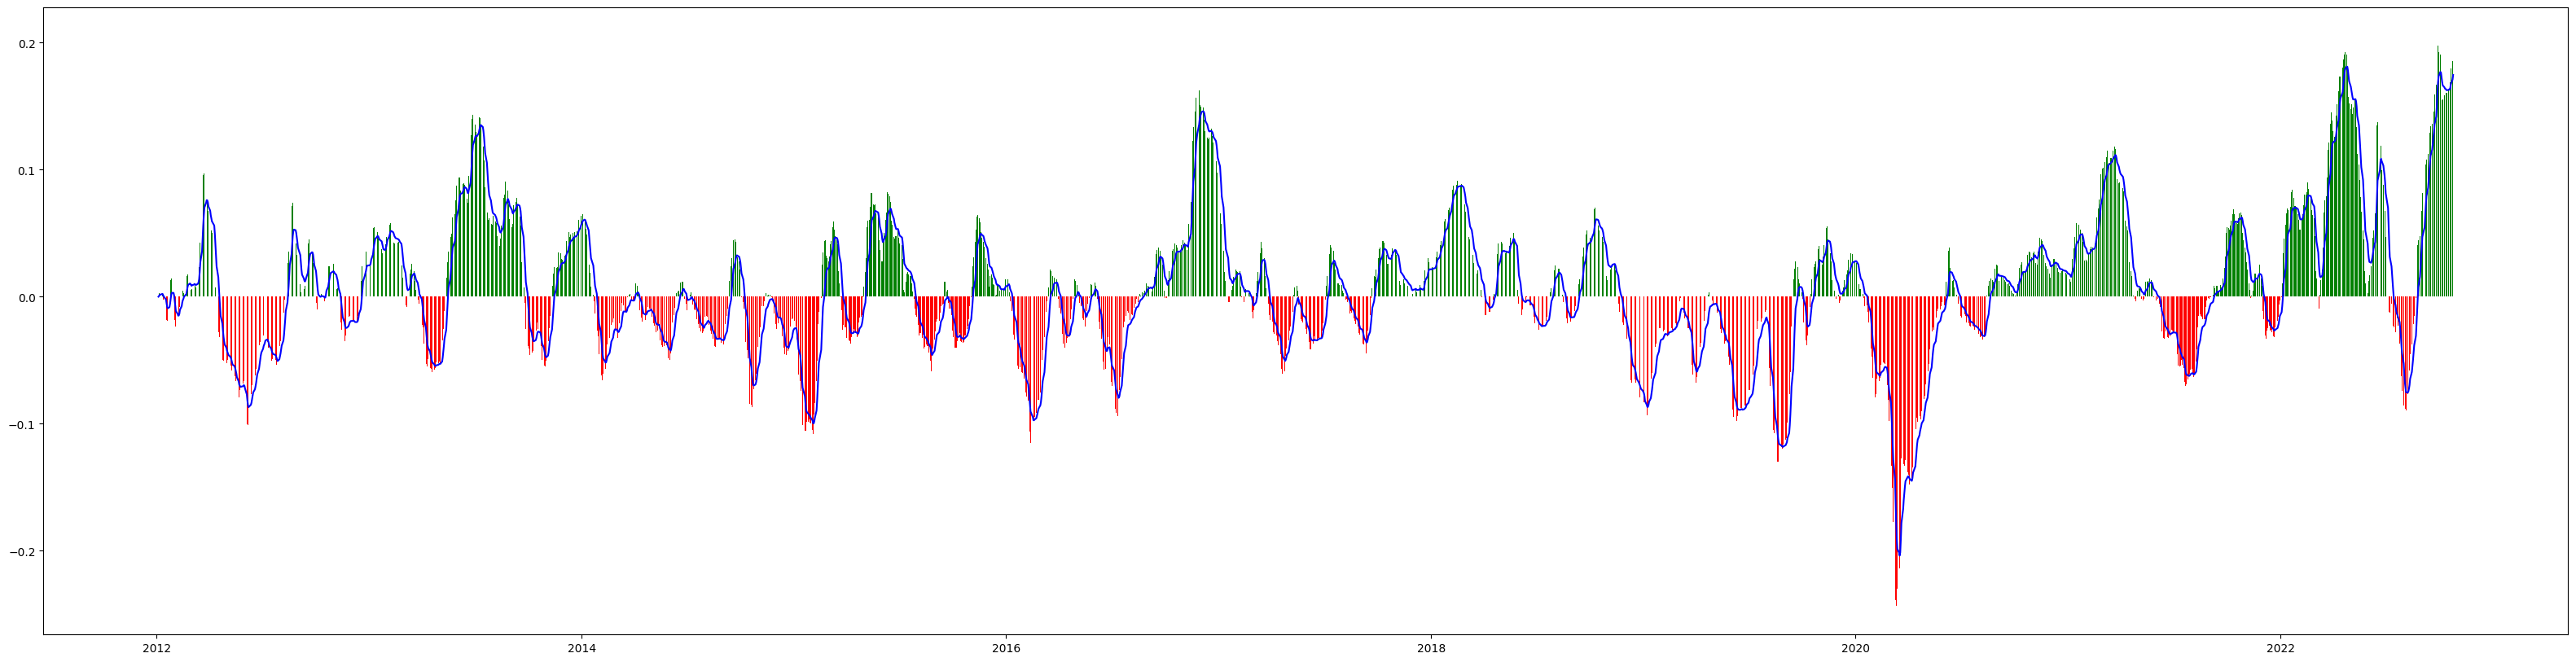

In [73]:
def calc_macd(data, len1, len2, len3):   ### Moving average but with exponential 
    shortEMA = data.ewm(span = len1, adjust =False).mean()
    longEMA = data.ewm(span = len2, adjust= False).mean()
    MACD = shortEMA - longEMA
    signal = MACD.ewm(span = len3, adjust= False).mean()
    return MACD, signal


MACD, signal = calc_macd(history['Previous_Close'], 12, 26 , 9) ### Need to check on the numbers here 
history['MACD'] = MACD
history['MACD_signal'] = signal

x = history.index.values # X values is the overall time 

plt.figure(figsize=(40,10))

colors = np.array(['green'] * len(history['MACD']))
colors[history['MACD'] < 0 ] = 'red'
plt.bar(x, history.MACD, color= colors)
plt.plot(x, history.MACD_signal, color= 'blue')
plt.show()

# BOLLINGER METHOD, CALCULATING THE MAXIMUM AND MINIMUM POINT

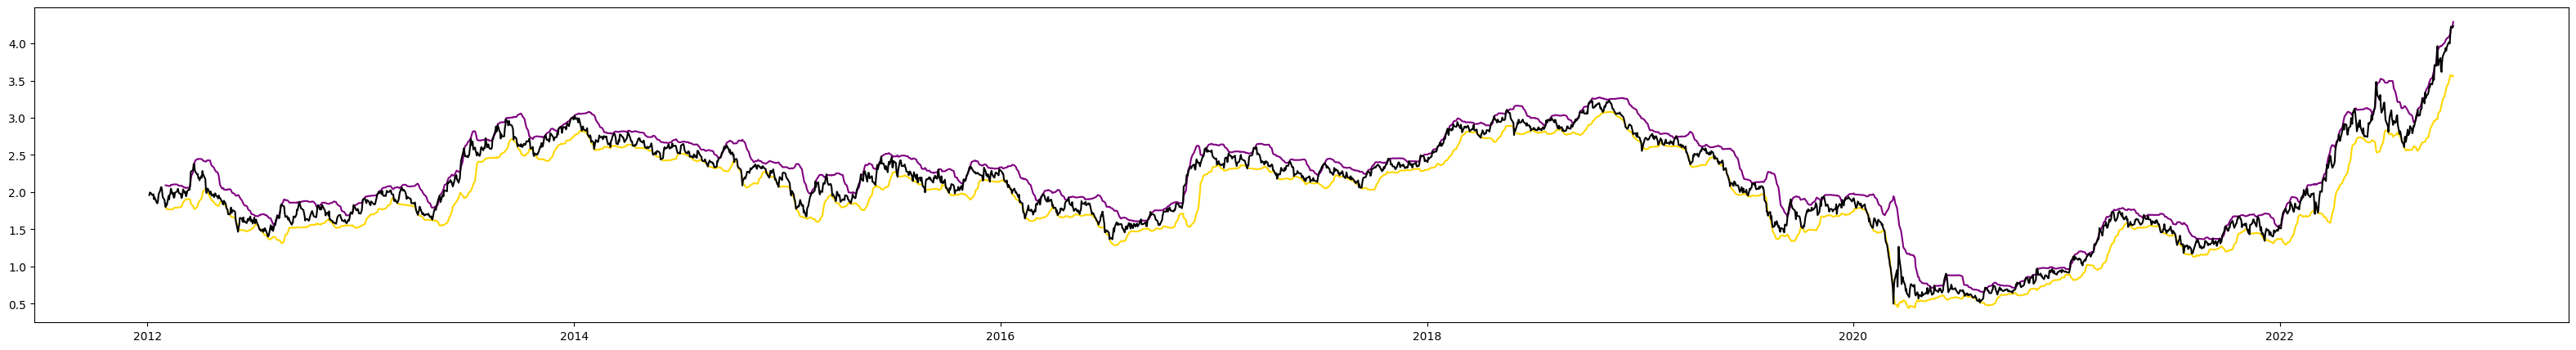

In [84]:
def calc_bollinger(data, period):
    mean = data.rolling(period).mean()
    SD = data.rolling(period).std()
    upper_band = np.array(mean) + 2 * np.array(SD)
    lower_band = np.array(mean) - 2 * np.array(SD)
    return upper_band, lower_band


upper, lower = calc_bollinger(history['Previous_Close'], 20) ##We can play around the number. THe number is days lookback (need to check)
history['Upper_Band'] = upper
history['Lower_Band'] = lower 

x = history.index.values # X values is the overall time 

plt.figure(figsize=(40,5))
plt.plot(x, history['Upper_Band'], color = 'purple') #Max
plt.plot(x, history['Lower_Band'], color = 'gold')  #Min


plt.plot(x, history['Previous_Close'], color = 'black')




plt.show()

In [86]:
history.head(-1)

,Open,Close,Previous_Close,Weekday,50SMA,100SMA,200SMA,MACD,MACD_signal,Upper_Band,Lowe_Band,Lower_Band
Date,,,,,,,,,,,,
2012-01-03,1.951,1.960,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,1.937,1.995,1.960,2,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN
2012-01-05,1.991,1.993,1.995,3,NaN,NaN,NaN,0.002792,0.000558,NaN,NaN,NaN
2012-01-06,2.003,1.961,1.993,4,NaN,NaN,NaN,0.004788,0.001404,NaN,NaN,NaN
2012-01-09,1.975,1.960,1.961,0,NaN,NaN,NaN,0.003745,0.001872,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-18,3.984,3.998,4.015,1,3.38736,3.17857,2.725680,0.164816,0.163233,4.097324,3.505276,3.505276
2022-10-19,4.094,4.127,3.998,2,3.41202,3.19106,2.738110,0.162306,0.163048,4.110210,3.535090,3.535090
2022-10-20,4.123,4.226,4.127,3,3.43862,3.20477,2.750605,0.168781,0.164195,4.132077,3.574923,3.574923
